In [1]:
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, fisher_exact
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

%matplotlib inline

In [2]:
theta_a = 0.03
theta_b = 0.10

In [3]:
num_obs = 1000

num_obs_a = num_obs
num_obs_b = num_obs

success_a = binom.rvs(n = num_obs_a, p = theta_a)

est_a = success_a / num_obs_a 

success_b = binom.rvs(n = num_obs_b, p = theta_b)

est_b = success_b / num_obs_b 

In [4]:
# find margin of error
conf_level = 0.95


z = norm.ppf(1 - (1 - conf_level) / 2)


margin_of_error_a = 100 * z * np.sqrt(est_a * (1 - est_a) / num_obs_a)
margin_of_error_b = 100 * z * np.sqrt(est_b * (1 - est_b) / num_obs_b)

In [5]:
est_a = 100 * est_a
est_b = 100 * est_b

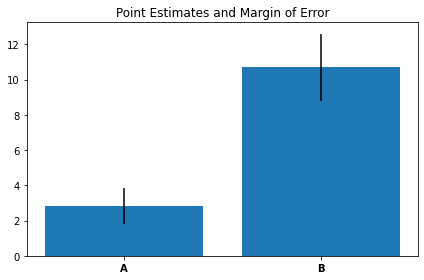

In [6]:
plt.bar([0, 1], [est_a, est_b], yerr = [margin_of_error_a, margin_of_error_b])
plt.xticks(labels = ['A', 'B'], ticks = [0,1], fontweight = 'bold')
plt.title('Point Estimates and Margin of Error')

plt.tight_layout()
plt.savefig('images/Bar_Chart.png', dpi = 150);

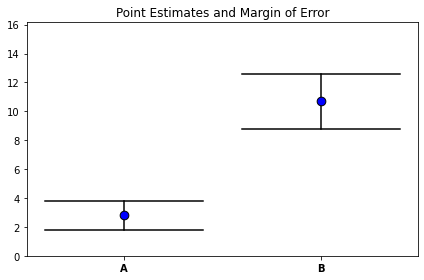

In [7]:
width = 0.05

ticks = [0, 0.125]

ests = [est_a, est_b]
moes = [margin_of_error_a, margin_of_error_b]

plt.scatter([0,0.125], ests, color = 'blue', edgecolor = 'black', s = 75, zorder = 500, label = 'point estimates')

for i, est, moe in zip([0,0.125], ests, moes):
    plt.plot([i, i], [est - moe, est + moe], color = 'black')
    plt.plot([i - width, i + width], [est + moe, est + moe], color = 'black')
    plt.plot([i - width, i + width], [est - moe, est - moe], color = 'black')
    
ymin, ymax = plt.ylim()
plt.ylim(0, ymax + 3)
plt.xticks(labels = ['A', 'B'], ticks = [0, 0.125], fontweight = 'bold')
plt.title('Point Estimates and Margin of Error')

plt.tight_layout()
plt.savefig('images/Dots.png', dpi = 150);


In [8]:
100 * z * np.sqrt(.038 * (1 - .038) / 1000)

1.1850247619745946

In [9]:
clicks = 36
impressions = 1000

pt_est = clicks / impressions

moe = z * np.sqrt(pt_est * (1 - pt_est) / impressions)

In [10]:
def make_plot(pt_est, moe, show_ci = False):
    
    color = 'blue'
    linecolor = 'blue'
    
    plt.figure(figsize = (10, 4))
    
    plt.scatter([pt_est], [0], alpha = 0)
    ymin, ymax = plt.ylim()


    plt.scatter([pt_est], [0.01], color = color, s = 100, edgecolor = 'black', linewidth = 1.5, zorder = 100)


    plt.hlines(y = 0, xmin = 0.0175, xmax = 0.0525)

    plt.xlim(0.0175, 0.0525)

    xtick = np.arange(start = 0.02, stop = 0.051, step = 0.005)
    for x in xtick:
        plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)
        plt.plot([x, x], [0, -0.005], color = 'black')

        
    if show_ci:
        plt.plot([pt_est - moe, pt_est + moe], [0.01, 0.01], color = linecolor)
        plt.plot([pt_est - moe, pt_est - moe], [0.005, 0.015], color = linecolor)
        plt.plot([pt_est + moe, pt_est + moe], [0.005, 0.015], color = linecolor)

    
    plt.ylim(ymin, ymax)

    plt.axis('off');

<ipython-input-10-a89d68a99e69>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)


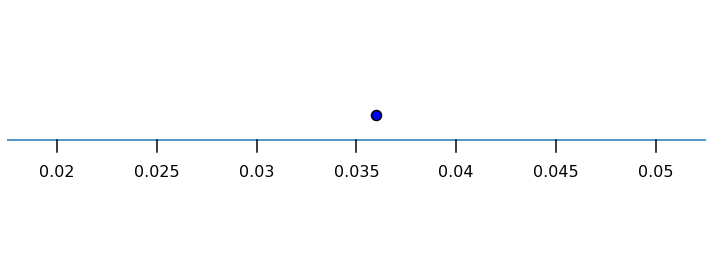

In [11]:
make_plot(pt_est = pt_est, moe = moe, show_ci = False)

plt.tight_layout()
plt.savefig('images/point_estimate_01.png', dpi = 150)

<ipython-input-10-a89d68a99e69>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)


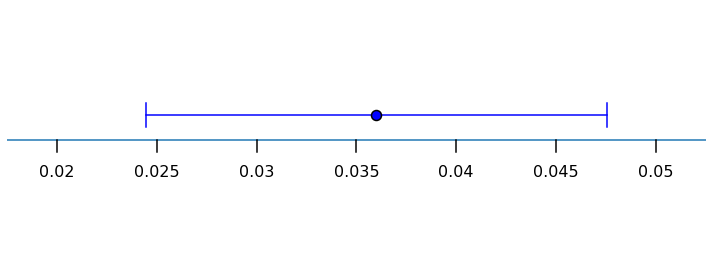

In [12]:
make_plot(pt_est = pt_est, moe = moe, show_ci = True)

plt.tight_layout()
plt.savefig('images/moe_01.png', dpi = 150)

In [13]:
clicks = 5000*0.036
impressions = 5000

pt_est = clicks / impressions

moe = z * np.sqrt(pt_est * (1 - pt_est) / impressions)

<ipython-input-10-a89d68a99e69>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)


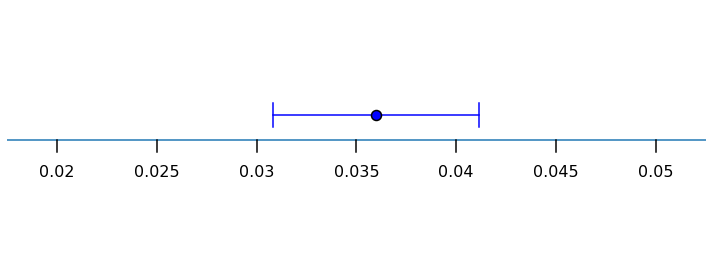

In [14]:
make_plot(pt_est = pt_est, moe = moe, show_ci = True)

plt.tight_layout()
plt.savefig('images/moe_02.png', dpi = 150)

In [15]:
def make_plot_two(pt_ests, moes, show_ci = False):
    
    colors = ['blue', 'red']
    linecolors = ['blue', 'red']
    
    plt.figure(figsize = (10, 4))
    
    plt.scatter([pt_ests[0]], [0], alpha = 0)
    ymin, ymax = plt.ylim()

    for pt_est, color, y in zip(pt_ests, colors, [0.01, 0.02]):
        plt.scatter([pt_est], [y], color = color, s = 100, edgecolor = 'black', linewidth = 1.5, zorder = 100)


    plt.hlines(y = 0, xmin = 0.0175, xmax = 0.0525)

    plt.xlim(0.0175, 0.0525)

    xtick = np.arange(start = 0.02, stop = 0.051, step = 0.005)
    for x in xtick:
        plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)
        plt.plot([x, x], [0, -0.005], color = 'black')

        
    if show_ci:
        for pt_est, moe, linecolor, y in zip(pt_ests, moes, linecolors, [0.01, 0.02]):
            plt.plot([pt_est - moe, pt_est + moe], [y, y], color = linecolor)
            plt.plot([pt_est - moe, pt_est - moe], [y - 0.005, y + 0.005], color = linecolor)
            plt.plot([pt_est + moe, pt_est + moe], [y - 0.005, y + 0.005], color = linecolor)

    
    plt.ylim(ymin, ymax)

    plt.axis('off');

In [16]:
clicks_a = 28
clicks_b = 39
impressions = 1000

pt_est_a = clicks_a / impressions
pt_est_b = clicks_b / impressions

moe_a = z * np.sqrt(pt_est_a * (1 - pt_est_a) / impressions)
moe_b = z * np.sqrt(pt_est_b * (1 - pt_est_b) / impressions)

<ipython-input-15-f0dd902d7cec>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)


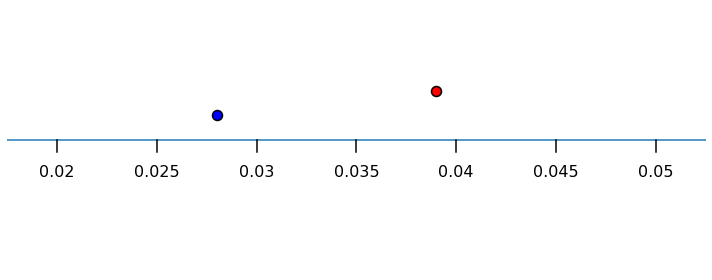

In [17]:
make_plot_two(pt_ests = [pt_est_a, pt_est_b], moes = [moe_a, moe_b], show_ci = False)

plt.tight_layout()
plt.savefig('images/pt_est_two.png', dpi = 150);

<ipython-input-15-f0dd902d7cec>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)


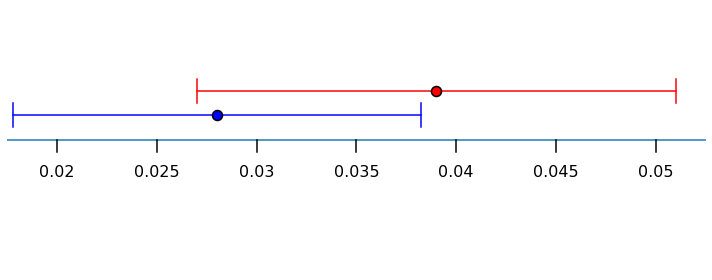

In [18]:
make_plot_two(pt_ests = [pt_est_a, pt_est_b], moes = [moe_a, moe_b], show_ci = True)

plt.tight_layout()
plt.savefig('images/moe_two.png', dpi = 150);

In [19]:
fisher_exact([[clicks_a, impressions - clicks_a], [clicks_b, impressions - clicks_b]])

(0.7098237838978579, 0.21370199834399467)

In [20]:
proportions_ztest(count = [clicks_a, clicks_b], nobs = [impressions, impressions])

(-1.3669554304132965, 0.1716392759872153)

In [21]:
clicks_a = 140
clicks_b = 195
impressions = 5000

pt_est_a = clicks_a / impressions
pt_est_b = clicks_b / impressions

moe_a = z * np.sqrt(pt_est_a * (1 - pt_est_a) / impressions)
moe_b = z * np.sqrt(pt_est_b * (1 - pt_est_b) / impressions)

<ipython-input-15-f0dd902d7cec>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = str(round(x, 3)), xy = (x, -0.015), ha = 'center', fontsize = 16)


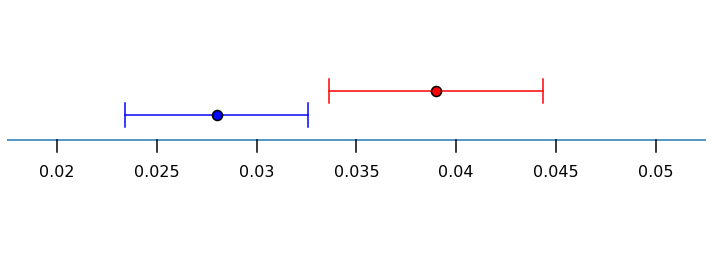

In [22]:
make_plot_two(pt_ests = [pt_est_a, pt_est_b], moes = [moe_a, moe_b], show_ci = True)

plt.tight_layout()
plt.savefig('images/moe_two_2.png', dpi = 150);

In [23]:
proportions_ztest(count = [clicks_a, clicks_b], nobs = [impressions, impressions])

(-3.056605264616614, 0.002238588626774004)

In [24]:
fisher_exact([[clicks_a, impressions - clicks_a], [clicks_b, impressions - clicks_b]])

(0.7098237838978579, 0.0026412992208492297)

# Power Calculations

Fact: If proportions are $p_1$ and $p_2$, then the difference is approximately normally distributed with a mean of $p_1 - p_2$ and standard deviation $\sqrt{ \frac{p_1(1 - p_1)}{n_1} + \frac{p_2(1 - p_2)}{n_2}}$

In [25]:
p1 = 0.025
p2 = 0.03

In [26]:
#impressions = 15,744
impressions = 1000
#impressions = 16000

In [27]:
mu_null = 0
sigma_null = np.sqrt(p1*(1-p1) / impressions + p1*(1-p1) / impressions)

mu_alt = p2 - p1
sigma_alt = np.sqrt(p1*(1-p1) / impressions + p2*(1-p2) / impressions)

In [28]:
if impressions == 1000:
    xmin = norm.ppf(loc = mu_null, scale = sigma_null, q = 0.001)
    xmax = norm.ppf(loc = mu_alt, scale = sigma_alt, q = 0.999)

In [29]:
x = np.linspace(xmin, xmax,
               num = 250)
y_null = norm.pdf(x, loc = mu_null, scale = sigma_null)
y_alt = norm.pdf(x, loc = mu_alt, scale = sigma_alt)

In [30]:
min_reject = norm.ppf(loc = mu_null, scale = sigma_null, q = 0.975)

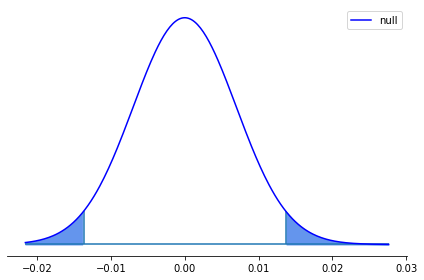

In [31]:
fillcolor = 'cornflowerblue'

fig, ax = plt.subplots()

plt.plot(x, y_null, color = 'blue', label = 'null')
#plt.plot(x, y_alt, color = 'red', label = 'true')

plt.hlines(y = 0, xmin = xmin, xmax = xmax)

lower_cutoff = norm.ppf(q = 0.025, loc = mu_null, scale = sigma_null)
upper_cutoff = -lower_cutoff

for co in [lower_cutoff, upper_cutoff]:
    plt.vlines(x = co, ymin = 0, ymax = norm.pdf(co, loc = mu_null, scale = sigma_null))
    
plt.fill_between(x[x<=lower_cutoff], y_null[x<=lower_cutoff], color = fillcolor)
plt.fill_between(x[x>=upper_cutoff], y_null[x>=upper_cutoff], color = fillcolor)

plt.yticks([])

for side in ['right', 'left', 'top']:
    ax.spines[side].set_visible(False)
    
plt.legend()

plt.tight_layout()
plt.savefig('images/null_dist_2.png', dpi = 150);

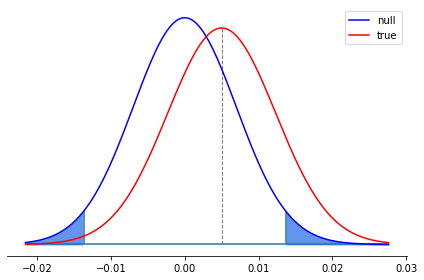

In [32]:
fillcolor = 'cornflowerblue'

fig, ax = plt.subplots()

plt.plot(x, y_null, color = 'blue', label = 'null')
plt.plot(x, y_alt, color = 'red', label = 'true')

plt.hlines(y = 0, xmin = xmin, xmax = xmax)

lower_cutoff = norm.ppf(q = 0.025, loc = mu_null, scale = sigma_null)
upper_cutoff = -lower_cutoff

for co in [lower_cutoff, upper_cutoff]:
    plt.vlines(x = co, ymin = 0, ymax = norm.pdf(co, loc = mu_null, scale = sigma_null))
    
plt.fill_between(x[x<=lower_cutoff], y_null[x<=lower_cutoff], color = fillcolor)
plt.fill_between(x[x>=upper_cutoff], y_null[x>=upper_cutoff], color = fillcolor)

plt.yticks([])

plt.vlines(x = 0.005, ymin = 0, ymax = norm.pdf(0.005, loc = mu_alt, scale = sigma_alt), 
           linestyle = '--', color = 'grey', linewidth = 1)

for side in ['right', 'left', 'top']:
    ax.spines[side].set_visible(False)
    
plt.legend()

plt.tight_layout()
plt.savefig('images/both_dist_2.png', dpi = 150);

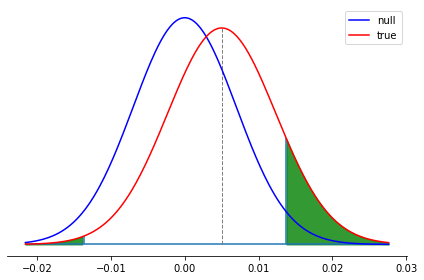

In [33]:
power = round(1 - norm.cdf(min_reject, loc = mu_alt, scale = sigma_alt) - norm.cdf(-min_reject, loc = mu_alt, scale = sigma_alt), 2)

fillcolor = 'green'

fig, ax = plt.subplots()

plt.plot(x, y_null, color = 'blue', label = 'null')
plt.plot(x, y_alt, color = 'red', label = 'true')

plt.hlines(y = 0, xmin = xmin, xmax = xmax)

lower_cutoff = norm.ppf(q = 0.025, loc = mu_null, scale = sigma_null)
upper_cutoff = -lower_cutoff

for co in [lower_cutoff, upper_cutoff]:
    plt.vlines(x = co, ymin = 0, ymax = norm.pdf(co, loc = mu_alt, scale = sigma_alt))
    
#plt.fill_between(x[x<=lower_cutoff], y_null[x<=lower_cutoff], color = fillcolor)
#plt.fill_between(x[x>=upper_cutoff], y_null[x>=upper_cutoff], color = fillcolor)

plt.fill_between(x[x <= -min_reject], y_alt[x <= -min_reject], alpha = 0.8, color = fillcolor)
plt.fill_between(x[x >= min_reject], y_alt[x >= min_reject], alpha = 0.8, color = fillcolor)

ymin, ymax = plt.ylim()

plt.vlines(x = 0.005, ymin = 0, ymax = norm.pdf(0.005, loc = mu_alt, scale = sigma_alt), 
           linestyle = '--', color = 'grey', linewidth = 1)


# plt.annotate(s = str(power), 
#              xy = (min_reject + min_reject / 25, 0),
#             ha = 'left', va = 'bottom', fontsize = 18, fontweight = 'bold')


plt.yticks([])

for side in ['right', 'left', 'top']:
    ax.spines[side].set_visible(False)
    
plt.legend()

plt.tight_layout()
plt.savefig('images/power_2.png', dpi = 150);

In [34]:
power

0.11

In [35]:
p1 = 0.025
#p2 = 0.03
p2 = 0.035

In [36]:
def find_power(impressions):
    mu_null = 0
    sigma_null = np.sqrt(p1*(1-p1) / impressions + p1*(1-p1) / impressions)

    mu_alt = p2 - p1
    sigma_alt = np.sqrt(p1*(1-p1) / impressions + p2*(1-p2) / impressions)
    
    min_reject = norm.ppf(loc = mu_null, scale = sigma_null, q = 0.975)
    
    power = 1 - norm.cdf(min_reject, loc = mu_alt, scale = sigma_alt) - norm.cdf(-min_reject, loc = mu_alt, scale = sigma_alt)
    
    return power
    

In [37]:
find_power_vect = np.vectorize(find_power)

In [38]:
imp_range = np.linspace(start = 10, stop = 25000, num = 10000, dtype=int)

In [39]:
powers = find_power_vect(imp_range)

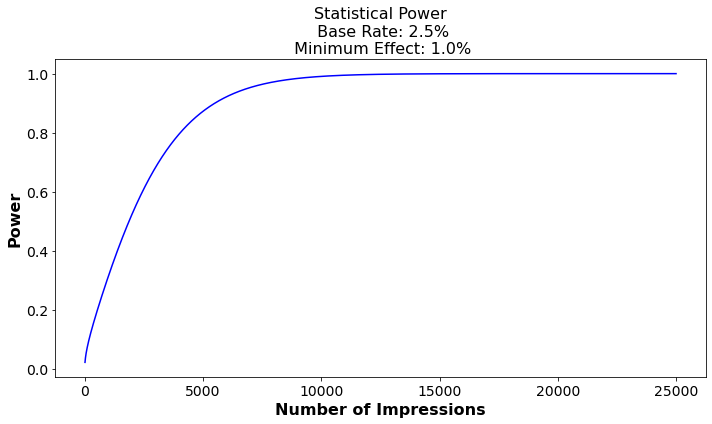

In [40]:
plt.figure(figsize = (10,6))

fontsize = 16

plt.plot(imp_range, powers, color = 'blue')
plt.xlabel('Number of Impressions', fontsize = fontsize, fontweight = 'bold')
plt.ylabel('Power', fontsize = fontsize, fontweight = 'bold')
plt.title('Statistical Power\n Base Rate: 2.5%\n Minimum Effect: 1.0%', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2)
plt.yticks(fontsize = fontsize - 2)

plt.tight_layout()
plt.savefig('images/power_curve_1.png', dpi = 150);

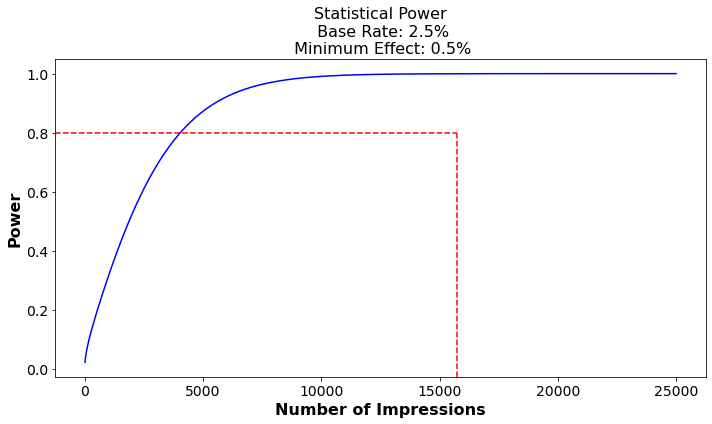

In [41]:
plt.figure(figsize = (10,6))

fontsize = 16

plt.plot(imp_range, powers, color = 'blue')
plt.xlabel('Number of Impressions', fontsize = fontsize, fontweight = 'bold')
plt.ylabel('Power', fontsize = fontsize, fontweight = 'bold')
plt.title('Statistical Power\n Base Rate: 2.5%\n Minimum Effect: 0.5%', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2)
plt.yticks(fontsize = fontsize - 2)

plt.tight_layout()

xmin, xmax = plt.xlim()
plt.hlines(y = 0.8, xmin = xmin, xmax = 15744, linestyle = '--', color = 'red')

ymin, ymax = plt.ylim()
plt.vlines(x = 15744, ymin = ymin, ymax = 0.8, linestyle = '--', color = 'red')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


plt.savefig('images/power_curve_1b.png', dpi = 150);

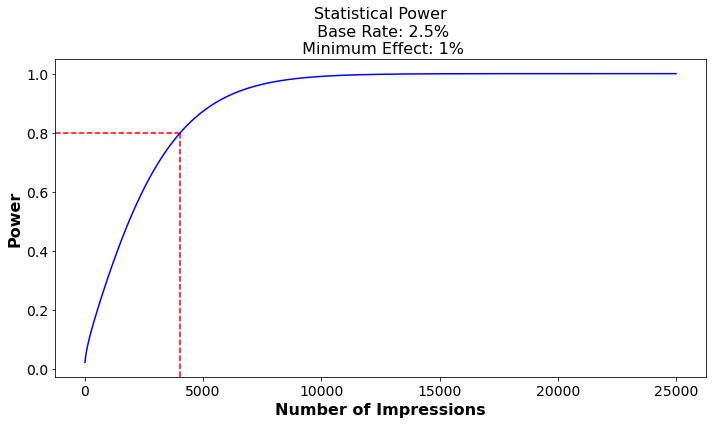

In [42]:
min_sample = 4041


plt.figure(figsize = (10,6))

fontsize = 16

plt.plot(imp_range, powers, color = 'blue')
plt.xlabel('Number of Impressions', fontsize = fontsize, fontweight = 'bold')
plt.ylabel('Power', fontsize = fontsize, fontweight = 'bold')
plt.title('Statistical Power\n Base Rate: 2.5%\n Minimum Effect: 1%', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2)
plt.yticks(fontsize = fontsize - 2)

plt.tight_layout()

xmin, xmax = plt.xlim()
plt.hlines(y = 0.8, xmin = xmin, xmax = min_sample, linestyle = '--', color = 'red')

ymin, ymax = plt.ylim()
plt.vlines(x = min_sample, ymin = ymin, ymax = 0.8, linestyle = '--', color = 'red')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


plt.savefig('images/power_curve_2b.png', dpi = 150);